<a href="https://colab.research.google.com/github/Wasim-Zaman/deep_learning_with_tensorflow/blob/main/003_Computer_Vision_%26_Convolutional_Neural_Network_With_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducation to Convolutional Neural Network and Computer Vision

## Computer Vision Definition

Computer Vision is all about writing algorithms that can discover patterns in visual data such as camera of self driving car recognizes the obstacles, cars and other things coming in front.

## Getting the data before creating CNN

In order to create a computer vision model or convolutional neural network, we need some kind of data to work on

## Downloading the zip data & unzipping it

In [ ]:
import zipfile

# Downloading the data into the google colab
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzipping the data (extracting it for use)
zip_file = zipfile.ZipFile('pizza_steak.zip')
zip_file.extractall()

--2022-10-30 04:33:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.199.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  85.8MB/s    in 1.2s    

2022-10-30 04:33:52 (85.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

now that we have the zip file downloaded, and we have data as well. It is now time to see how the data looks like before actually writing or creating model for it to understand patterns in it

In [ ]:
# inspect the parent directory

!ls pizza_steak # ls means list the existing directory we have

test  train


In [ ]:
# inspect the train folder in the parent folder 
!ls pizza_steak/train/

pizza  steak


In [ ]:
# inspect the pizza inside the train folder
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

Wow.... It means that we have so many pictures available, let's now see how many images we have in each single directory

In [ ]:
# Walking through all the directories and all the files inside the directory
import os

# !ls pizza_steak/train/pizza/
# !ls pizza_steak/train/steak/
# !ls pizza_steak/test/pizza/
# !ls pizza_steak/test/steak/

for dir_path, dir_name, file_name in os.walk('pizza_steak'):
  print (f"There are {len(dir_name)} directories and {len(file_name)} files in {dir_path} .") 

There are 2 directories and 0 files in pizza_steak .
There are 2 directories and 0 files in pizza_steak/train .
There are 0 directories and 750 files in pizza_steak/train/steak .
There are 0 directories and 750 files in pizza_steak/train/pizza .
There are 2 directories and 0 files in pizza_steak/test .
There are 0 directories and 250 files in pizza_steak/test/steak .
There are 0 directories and 250 files in pizza_steak/test/pizza .


Besides this, we can inspect images inside the directory in another way as well.

In [ ]:
# Another way to see the number of images
number_of_pizza_images = len(os.listdir('pizza_steak/train/pizza'))
print(number_of_pizza_images)

750


# Visualizing Images

The best way to inspect the images is to plot random images.
but before that we need to identify classes programmaticaly.
Let's see what we are trying to say....

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')   # directory path to train data
print (data_dir)

# let's create a list of classes programmatically
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print (class_names)

pizza_steak/train
['pizza' 'steak']


## Visualizing random image

In [ ]:
def plot_random_image(root_dir, test_or_train, class_name):
  '''
  Accepts arguments as String then plots random image and return that image as well
  '''
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  import random
  import os

  # Setting the target directory from where the image would plot
  target_dir = root_dir + '/' + test_or_train + '/' + class_name

  # picking the random image out of all the images
  rand_image = random.choice(os.listdir(target_dir))

  # Reading the image from target file into the np array
  img = mpimg.imread(target_dir + '/' + rand_image)

  # Ploting the image using matplotlib
  plt.figure(figsize=(7, 7))
  plt.imshow(img)
  plt.title(class_name)
  plt.axis('off')
  
  print (f"The shape of the image is: {img.shape}")

  # returning the image to the called function
  return img



array([[[ 85,  86,  88],
        [ 84,  85,  87],
        [ 82,  83,  85],
        ...,
        [137,  90,  64],
        [139,  92,  62],
        [140,  94,  60]],

       [[ 86,  87,  89],
        [ 85,  86,  88],
        [ 83,  84,  86],
        ...,
        [138,  91,  65],
        [138,  91,  61],
        [136,  90,  56]],

       [[ 87,  88,  90],
        [ 87,  88,  90],
        [ 86,  87,  89],
        ...,
        [142,  92,  67],
        [137,  91,  58],
        [134,  88,  52]],

       ...,

       [[102,  81,  90],
        [111,  90,  99],
        [124, 103, 112],
        ...,
        [ 81,  67,  64],
        [ 79,  65,  62],
        [ 76,  62,  59]],

       [[ 96,  81,  88],
        [ 98,  83,  90],
        [103,  86,  94],
        ...,
        [ 79,  65,  62],
        [ 78,  64,  61],
        [ 74,  60,  57]],

       [[111, 100, 106],
        [107,  96, 102],
        [101,  88,  95],
        ...,
        [ 76,  62,  59],
        [ 75,  61,  58],
        [ 71,  57,  54]]

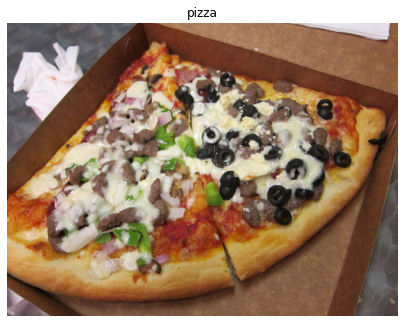

In [ ]:
plot_random_image(root_dir='pizza_steak', test_or_train='train', class_name='pizza')